In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Projections in R^2
---


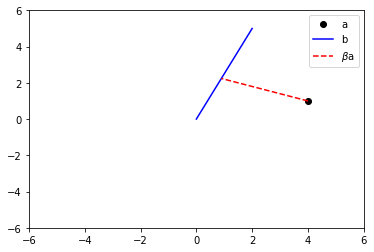

In [2]:

# point b
b = np.array([4,1])

# line a
a = np.array([ 2, 5 ])

# beta
beta = (np.matrix.transpose(a)@b) / (np.matrix.transpose(a)@a)

# draw!
plt.plot(b[0],b[1],'ko',label='a')
plt.plot([0, a[0]],[0, a[1]],'b',label='b')

# now plot projection line
plt.plot([b[0], beta*a[0]],[b[1], beta*a[1]],'r--',label=r'$\beta$a')

plt.legend()
plt.axis((-6, 6, -6, 6))

plt.show()


---
# VIDEO: Projections in R^N
---


In [2]:
## the goal here is to solve Ax=b for x

# sizes
m = 16
n = 10

# vector b
b = np.random.randn(m,1)

# matrix A
A = np.random.randn(m,n)

# solution using explicit inverse
x1 = np.linalg.inv(np.matrix.transpose(A)@A) @ (np.matrix.transpose(A)@b)

# python solution
x2 = np.linalg.solve(np.matrix.transpose(A)@A,np.matrix.transpose(A)@b)

# show that the results are the same
print([x1,x2])

[array([[ 0.26000108],
       [-0.17960443],
       [ 0.26928739],
       [ 0.70845765],
       [-0.67287784],
       [ 0.21438372],
       [-0.0449956 ],
       [-0.35622263],
       [ 0.01587047],
       [-0.0979201 ]]), array([[ 0.26000108],
       [-0.17960443],
       [ 0.26928739],
       [ 0.70845765],
       [-0.67287784],
       [ 0.21438372],
       [-0.0449956 ],
       [-0.35622263],
       [ 0.01587047],
       [-0.0979201 ]])]


[[-1.55211834]
 [ 0.82022363]
 [-0.35676585]]
[[-0.59895342]
 [-0.11459319]
 [-0.88237029]]


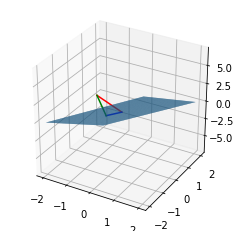

In [51]:
## geometric perspective in R^3

# matrix sizes
m = 3
n = 2

# vector b
b = np.random.randn(m,1)

# matrix A
A = np.random.randn(m,n)


# solution
x = np.linalg.solve(np.matrix.transpose(A)@A,np.matrix.transpose(A)@b)
Ax = A@x

print(b)
print(Ax)

## plot
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.gca(projection='3d')

# plot the vectors
ax.plot([0, b[0]],[0, b[1]],[0, b[2]],'r')
ax.plot([0, Ax[0]],[0, Ax[1]],[0, Ax[2]],'b')

# plot the projection line
ax.plot( [Ax[0][0], b[0]],
         [Ax[1][0], b[1]],
         [Ax[2][0], b[2]], 'g')

# now draw plane
xx, yy = np.meshgrid(np.linspace(-2,2), np.linspace(-2,2))
cp = np.cross(A[:,0],A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1)

plt.show()


---
# VIDEO: QR decomposition
---


In [16]:
# example from the slides

A = [ [1,0],
      [1,0],
      [0,1] ]
  
# "full" QR decomposition
Q,R = np.linalg.qr(A,'complete')
print(Q)

# "economy" QR decompmosition
Q,R = np.linalg.qr(A) # is the default option in Python
print(Q)

[[-0.70710678  0.          0.70710678]
 [-0.70710678  0.         -0.70710678]
 [-0.         -1.          0.        ]]
[[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [-0.         -1.        ]]


R from QR: 
[[-3.16227766  0.63245553 -0.31622777]
 [ 0.         -1.26491106  2.21359436]]
R from Q^TA: 
[[-3.16227766e+00  6.32455532e-01 -3.16227766e-01]
 [ 4.44089210e-16 -1.26491106e+00  2.21359436e+00]]


[]

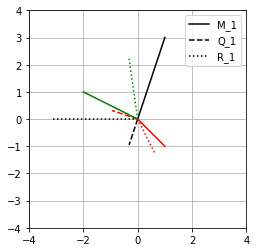

In [74]:
## another example

# the to-be-decomposed matrix
M = np.array( [ [1, 1,-2], [3,-1, 1] ] )

# QR decomposition
Q,R = np.linalg.qr(M,'complete')

# notice:
print('R from QR: '),print(R)
print('R from Q^TA: '),print(Q.T@M)

# plot
colorz = 'krg'

for i in range(0,np.shape(M)[1]):
    
    # plot original vector M
    plt.plot([0,M[0,i]],[0,M[1,i]],colorz[i])
    
    # plot orthogonalized vector Q
    if i<np.shape(Q)[1]:
        plt.plot([0,Q[0,i]],[0,Q[1,i]],colorz[i],linestyle='--')
    
    # plot residual vector R
    plt.plot([0,R[0,i]],[0,R[1,i]],colorz[i],linestyle=':')

    
plt.legend(['M_1','Q_1','R_1'])
plt.axis('square')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.grid(True)
plt.plot()
